## IMPORT LIBRARIES

In [517]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import svd
from copy import deepcopy
from numpy import linalg as LA

## GET DATA

In [518]:
# Using pandas library to import dataset
dataset= pd.read_csv(r"C:\Users\tiger\Downloads\house_prices_data_training_data.csv",parse_dates=['date'])
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


## PREPARE

In [519]:
# Dropping NAN values
dataset = dataset.dropna()

In [520]:
# Splitting train and test sets
msk = np.random.rand(len(dataset)) < 0.8

In [521]:
train = dataset[msk]

In [522]:
test = dataset[~msk]

In [523]:
# Size of train and test sets
print(len(train), "train +", len(test), "test")

14357 train + 3642 test


In [524]:
# Matrix of features (test and training sets)
X_train = train.drop(['id','date','price'],axis=1)
X_test = test.drop(['id','date','price'],axis=1)
y_train = train[['price']].copy()
y_test = test[['price']].copy()

In [525]:
# Feature Scaling X
mean = X_train.mean()
X_train_norm = X_train - mean
std = X_train_norm.std()
X_train_norm = X_train_norm / std
X_test_norm = (X_test - mean)/std
# Feature Scaling Y
mean_y = y_train.mean()
y_train_norm = (y_train - mean_y)
std_y = y_train_norm.std()
y_train_norm = y_train_norm / std_y
y_test_norm = (y_test-mean_y)/std_y

In [526]:
# Linear Regression model before any adjustments:
# With normalization
from sklearn.linear_model import LinearRegression # Importing linear_regression from sklearn library
regressor = LinearRegression() # Linear_regression object
regressor.fit(X_train_norm, y_train_norm) # fits to the training set to come up with the hyp. needed for making predictions
y_pred = regressor.predict(X_test_norm) # Use the test set to make predictions using trained hyp.
from sklearn import metrics
R_sq = metrics.r2_score(y_test_norm,y_pred) # R-squared : reflects how much of the variance is represented by the hyp.
mse = metrics.mean_squared_error(y_test_norm,y_pred) # computing MSE between the predicted vector and actual ones
print('MSE before PCA (18 features):', mse)
print('R-squared before PCA (18 features):', R_sq)

# # Without normalization
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)
# y_pred = regressor.predict(X_test)
# from sklearn import metrics
# R_sq = metrics.r2_score(y_test,y_pred)
# mse = metrics.mean_squared_error(y_test,y_pred)
# print('MSE before PCA (18 features):', mse)
# print('R-squared before PCA (18 features):', R_sq)

MSE before PCA (18 features): 0.28620528154827696
R-squared before PCA (18 features): 0.7052848414109858


## TASKS:

### 1. PCA

In [527]:
# TASK 1,2
# # Without Normalization
# corr_matrix = X_train.corr()
# corr_matrix
# With Normalization
corr_matrix = X_train_norm.corr() # computing the the correlation matrix
corr_matrix

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.516548,0.559551,0.026842,0.215239,-0.005156,0.083269,0.036279,0.360461,0.456207,0.308204,0.158444,0.022274,-0.138557,0.004083,0.107659,0.369442,0.023417
bathrooms,0.516548,1.000000,0.760000,0.089297,0.504553,0.074819,0.202489,-0.088085,0.659739,0.683318,0.305100,0.478521,0.073086,-0.199480,0.025055,0.219603,0.577160,0.088496
sqft_living,0.559551,0.760000,1.000000,0.169672,0.401855,0.108041,0.292902,-0.046266,0.769927,0.866897,0.458853,0.319738,0.066067,-0.177414,0.063182,0.213837,0.750601,0.180708
sqft_lot,0.026842,0.089297,0.169672,1.000000,0.018393,0.020404,0.065045,-0.018587,0.119609,0.187145,0.006458,0.080194,-0.002660,-0.126663,-0.087037,0.227008,0.148983,0.692927
floors,0.215239,0.504553,0.401855,0.018393,1.000000,0.041258,0.049254,-0.213778,0.462134,0.582409,-0.232767,0.412831,0.035347,-0.080378,0.027352,0.164356,0.327800,0.013934
waterfront,-0.005156,0.074819,0.108041,0.020404,0.041258,1.000000,0.390715,0.012237,0.083815,0.077164,0.078979,-0.017274,0.089852,0.032244,-0.015181,-0.047182,0.083672,0.028397
view,0.083269,0.202489,0.292902,0.065045,0.049254,0.390715,1.000000,0.037646,0.263867,0.176593,0.272220,-0.043280,0.104337,0.083682,0.005928,-0.081831,0.293590,0.064049
condition,0.036279,-0.088085,-0.046266,-0.018587,-0.213778,0.012237,0.037646,1.000000,-0.124374,-0.144330,0.164539,-0.314825,-0.076003,-0.002012,-0.015981,-0.107159,-0.090596,-0.016719
grade,0.360461,0.659739,0.769927,0.119609,0.462134,0.083815,0.263867,-0.124374,1.000000,0.762719,0.183470,0.433493,0.029807,-0.186565,0.110459,0.201998,0.735381,0.130693
sqft_above,0.456207,0.683318,0.866897,0.187145,0.582409,0.077164,0.176593,-0.144330,0.762719,1.000000,-0.045134,0.421288,0.038029,-0.240801,0.006638,0.324321,0.727512,0.198396


In [528]:
# # TASK 3 
#Without Normalization
# cov_matrix = X_train.cov()
# cov_matrix
# With Normalization
cov_matrix = X_train_norm.cov() # computing the correlation matrix
cov_matrix

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.516548,0.559551,0.026842,0.215239,-0.005156,0.083269,0.036279,0.360461,0.456207,0.308204,0.158444,0.022274,-0.138557,0.004083,0.107659,0.369442,0.023417
bathrooms,0.516548,1.000000,0.760000,0.089297,0.504553,0.074819,0.202489,-0.088085,0.659739,0.683318,0.305100,0.478521,0.073086,-0.199480,0.025055,0.219603,0.577160,0.088496
sqft_living,0.559551,0.760000,1.000000,0.169672,0.401855,0.108041,0.292902,-0.046266,0.769927,0.866897,0.458853,0.319738,0.066067,-0.177414,0.063182,0.213837,0.750601,0.180708
sqft_lot,0.026842,0.089297,0.169672,1.000000,0.018393,0.020404,0.065045,-0.018587,0.119609,0.187145,0.006458,0.080194,-0.002660,-0.126663,-0.087037,0.227008,0.148983,0.692927
floors,0.215239,0.504553,0.401855,0.018393,1.000000,0.041258,0.049254,-0.213778,0.462134,0.582409,-0.232767,0.412831,0.035347,-0.080378,0.027352,0.164356,0.327800,0.013934
waterfront,-0.005156,0.074819,0.108041,0.020404,0.041258,1.000000,0.390715,0.012237,0.083815,0.077164,0.078979,-0.017274,0.089852,0.032244,-0.015181,-0.047182,0.083672,0.028397
view,0.083269,0.202489,0.292902,0.065045,0.049254,0.390715,1.000000,0.037646,0.263867,0.176593,0.272220,-0.043280,0.104337,0.083682,0.005928,-0.081831,0.293590,0.064049
condition,0.036279,-0.088085,-0.046266,-0.018587,-0.213778,0.012237,0.037646,1.000000,-0.124374,-0.144330,0.164539,-0.314825,-0.076003,-0.002012,-0.015981,-0.107159,-0.090596,-0.016719
grade,0.360461,0.659739,0.769927,0.119609,0.462134,0.083815,0.263867,-0.124374,1.000000,0.762719,0.183470,0.433493,0.029807,-0.186565,0.110459,0.201998,0.735381,0.130693
sqft_above,0.456207,0.683318,0.866897,0.187145,0.582409,0.077164,0.176593,-0.144330,0.762719,1.000000,-0.045134,0.421288,0.038029,-0.240801,0.006638,0.324321,0.727512,0.198396


In [529]:
# TASK 4
U, S, V = svd(cov_matrix)

In [530]:
def alphacalc(S,K):
    alpha = 1 - (sum(S[0:K])/sum(S)) # computing alpha 
    return alpha

In [531]:
# TASK 5 (Loop to find the value of K that reflects to 99% of the variance)
K=0
for i in range(1,X_train.shape[1]):
    alpha = alphacalc(S,i)
    if alpha <= 0.001:
        K = i
        break
K

17

In [532]:
# TASK 6
# # # Without Normalization
# R = np.dot( U[:,0:K].T , X_train.T )
# R.shape
# With Normalization ( Finding the reduced dataset )
R = np.dot( U[:,0:K].T , X_train_norm.T ) # 17 x 18 * 18 x 14k
R.shape

(17, 14357)

In [533]:
# TASK 7 
# Getting the appx dataset back
A = np.dot(R.T,U[:,0:K].T) # 14k X 17 * 17 X 18
A.shape

(14357, 18)

In [534]:
# TASK 8 
# # Without Normalization
# Error = sum(((X_train - A)**2).sum(axis=0))
# Error
# With Normalization
# Computing the error between the actual and appx dataset
Error = sum(((X_train_norm - A)**2).sum(axis=0))
Error

2.348032083341128e-25

In [535]:
## TASK 9
# #Without Normalization
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(R.T, y_train)
# # With Normalization 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# Linear Regression for the reduced dataset
regressor.fit(R.T, y_train_norm) 



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [536]:
# PCA mapping for test dataset
# # Without normalization
# X_test_pca = np.dot( U[:,0:K].T , X_test.T )
# y_pred = regressor.predict(X_test_pca.T)
# With normalization
# PCA Mapping for the test set
X_test_pca = np.dot( U[:,0:K].T , X_test_norm.T )
y_pred = regressor.predict(X_test_pca.T)

In [537]:
# Evaluate Model 
from sklearn import metrics
# # Without normalization
# R_sq = metrics.r2_score(y_test,y_pred)
# mse = metrics.mean_squared_error(y_test,y_pred)
# # With normalization
# Computing R-squared and MSE for the reduced dataset (after PCA)
R_sq = metrics.r2_score(y_test_norm,y_pred)
mse = metrics.mean_squared_error(y_test_norm,y_pred)
print('MSE after PCA (',(K),') features:', mse)
print('R-squared after PCA (',(K),') features:', R_sq)

MSE after PCA ( 17 ) features: 0.28620528154827696
R-squared after PCA ( 17 ) features: 0.7052848414109858


In [538]:
# Results for MSE and R-squared -> Nearly the same as 99% of the variance is retained 

### 2. K-Means Clustering

In [539]:
# Steps for kmeans clustering :
# 1. Randomly initialize k cluster centroids
# 2. Cluster Assginment Step: pick the closest centroid for each data example
# 3. Update Centroids: change the position of the centroids to the mean of the data assigned to it.

In [540]:
# Method to perform the 1st step: Randomly initialize k centroids
def initalize_centroids(X,k_c):
    centroids = np.zeros((k_c,X.shape[1])) # centroids matrix: K(no. of clusters) x no. of features
    rand_ind = np.random.permutation(X.shape[0])
    centroids = X[rand_ind[0:k_c],:]
    return centroids

In [541]:
# Method to perform the 2nd step: Cluster Assignment.
# i/p: k(no. of clusters), X(training examples), centeroids
# o/p: cluster_ind (index of centroids for each train example)
def pick_closest_cent(k,X,centeroids):
    d = np.zeros((X.shape[0],k))
    cluster_ind = [None]*X.shape[0]
    for i in range(k):
        d[:,i] = LA.norm(X-centeroids[i],axis=1)
    cluster_ind = np.argmin(d,axis=1)
    return cluster_ind

In [542]:
# Method for the implenmentation of kmeans: performing 3 steps.
# i/p: k(no of clusters), data(training examples)
# o/p: new(cluster centroids), clusters(index of centroid for each training example)
def change_k(k,data):
    m = data.shape[0]
    c = data.shape[1]
    centeroid = initalize_centroids(data,k)
    old = np.zeros(centeroid.shape) 
    new = deepcopy(centeroid) 
    clusters = np.zeros(m)
    error = np.linalg.norm(new - old)
    while error != 0:
#         print(len(data))
        clusters = pick_closest_cent(k,data,centeroid)
        old = deepcopy(new)
        for i in range(k):
            new[i] = np.mean(data[clusters == i], axis=0)
        error = np.linalg.norm(new - old)
    return new,clusters

In [543]:
# Plotting on the reduced dataset
n_n=10 # number of clusters to be plotted
y_axis = [1]*n_n # cost 
X_axis = np.arange(2,n_n) # number of clusters
for k in range(2,n_n):
    cent,clusters = change_k(k,R.T)
    cost = [1]*k
    for i in range(0,k):
        fil = R.T[clusters==i]
        cost[i] = ((fil-cent[i])**2).sum()
    y_axis[k] = cost

In [544]:
# Plotting on the real dataset
n_n=10
y_axis_real = [1]*n_n
X_axis_real = np.arange(2,n_n)
for k in range(2,n_n):
    cent,clusters = change_k(k,X_train_norm.values)
    cost = [1]*k
    for i in range(0,k):
        fil = X_train_norm.values[clusters==i]
        cost[i] = ((fil-cent[i])**2).sum()
    y_axis_real[k] = cost

In [545]:
y_axis_real = y_axis_real[2:]

In [546]:
y_axis = y_axis[2:]

In [547]:
# Summation of cost
summed_real = [1]*len(y_axis_real)
for i in range(0,len(y_axis_real)):
    to_be_summed = y_axis_real[i]
    summed_real[i] = (sum(to_be_summed))*(1/len(X_train_norm))
summed_real

[15.704873745107207,
 14.708957830387282,
 14.156774821758937,
 13.504295269007324,
 12.471390368697712,
 11.685059519325522,
 11.523597413041104,
 11.39964204979388]

In [548]:
summed = [1]*len(y_axis)
for i in range(0,len(y_axis)):
    to_be_summed = y_axis[i]
    summed[i] = (sum(to_be_summed))*(1/len(R.T))
summed

[14.765902346388229,
 14.977970376450758,
 13.328799493562071,
 13.52907110676801,
 12.158696350822991,
 12.239014234030627,
 11.439235860366628,
 10.57737155267179]

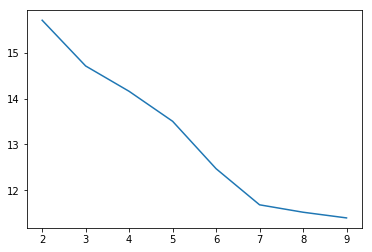

In [549]:
# plot the curve for number of clusters vs cost for the real dataset
plt.plot(X_axis_real,summed_real)

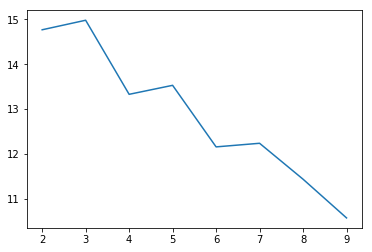

In [550]:
# plot the curve for number of clusters vs cost for the reduced dataset
plt.plot(X_axis,summed)

### 3. Anomaly Detection

In [551]:
index= int(X_test_pca.T.shape[0]*(0.5))
if ((X_test_pca.shape[1]) % 2) == 1:
    X_test_pca = X_test_pca[:,:-1]
CV_set = X_test_pca.T[:index,:2]
Test_set = X_test_pca.T[index:,:2]

In [552]:
upd = CV_set
n = upd.shape[1]
mean = [None]*n
sigma_s = [None]*n
# Fitting parameters
for i in range(0,n):
    mean[i]= np.mean(upd[:,i])
    sigma_s = np.var(upd[:,i])    

In [553]:
# Gaussian
def p(x, mu, sigma_s):
    return np.prod(1 / np.sqrt(2*np.pi*sigma_s) * np.exp(-(x-mu)**2/(2*sigma_s)), axis=1)

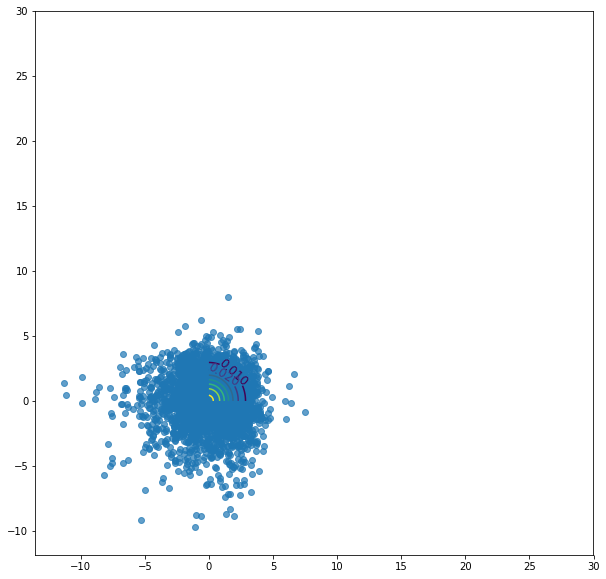

In [554]:
# Visualization
delta = 0.025
x = np.arange(0, 30, delta)
y = np.arange(0, 30, delta)
x, y = np.meshgrid(x, y)
z = p(np.hstack((x.reshape(-1, 1), y.reshape(-1, 1))), mean, sigma_s).reshape(x.shape)

plt.figure(figsize=(10, 10))
CS = plt.contour(x, y, z)
plt.clabel(CS, inline=1, fontsize=12)
plt.scatter(CV_set, Test_set, alpha=0.7)

In [555]:
detector = p(Test_set, mean, sigma_s)

In [556]:
# Fine-tuned value for epsilon
epsilon = 0.000001

In [557]:
# Extracting anomaly values
anomaly = detector[detector<epsilon]

In [558]:
# size of the anomaly values
anomaly.shape

(16,)

In [559]:
# Computing od the anomaly values percentage
perc = (anomaly.shape[0]/len(X_test_pca.T))*100
print("Percentage of anomaly examples in the dataset:"," ",perc,"%")

Percentage of anomaly examples in the dataset:   0.43931905546403077 %
